This notebook shows how the object is visible during a specific night. You can input your latitude, longitude, height and observing date. It shows the angular distance between the object and the Sun and the Moon. It also shows the lengths of twilights and nights throughout the year together with the altitude of the object during the middle of the night. Moreover, it also shows for how many hours the objects is above given altitude for both nights and astronomical nights.

Install astroplan since it is not a built-in package:

In [1]:
%pip install astroplan

Note: you may need to restart the kernel to use updated packages.


Import all the necessary packages:

In [2]:
from astropy.time import Time
import re
from datetime import datetime, timedelta
import astropy.units as u
import numpy as np
from astropy.coordinates import EarthLocation, AltAz, get_sun, SkyCoord, get_constellation, get_body
import matplotlib.pyplot as plt
import astroplan
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x745ad1429750>

Enter your location and time of observing (including UTC offset). If you wish to input it yourself, just comment latitude, longitude, observation_time and offset_hours.

In [3]:
%reset_selective -f latitude 
%reset_selective -f longitude
%reset_selective -f observation_time

#latitude = 45.829
latitude = 43.727269
longitude = 7.299111
#longitude = 15.979
observation_time = "2024-7-28"
#hgt = 0 # height in metres
hgt = 349
offset_hours = 2 # choose your time zone, be careful with the daylight saving timezones!

if 'latitude' in locals():
    if isinstance(latitude, (int, float)):
        if -90 <= latitude <= 90:
            pass
        else:
            raise ValueError("Invalid value for latitude. Latitude must be between -90 and 90 degrees.")
    else:
        raise TypeError("Invalid latitude. Please enter a numeric value.")
else:
    while True:
        try:
            latitude = float(input("Enter your latitude: "))
            if -90 <= latitude <= 90:
                break
            else:
                print("Invalid value for latitude. Latitude must be between -90 and 90 degrees.")
        except:
            print("Invalid latitude. Please enter a numeric value.")  
if latitude > 0:
    letter_lat = "N"
elif latitude < 0:
    letter_lat = "S"
else:
    letter_lat = ""
    
if latitude > 0:
    max_lat = latitude - 90
else:
    max_lat = latitude + 90
    
if 'longitude' in locals():
    if isinstance(longitude, (int, float)):
        if -180 < longitude <= 180:
            pass
        else:
            raise ValueError("Invalid value for longitude. longitude must be between -180 and 180 degrees.")
    else:
        raise TypeError("Invalid longitude. Please enter a numeric value.")
else:
    while True:
        try:
            longitude = float(input("Enter your longitude: "))
            if -180 < longitude <= 180:
                break
            else:
                print("Invalid value for longitude. longitude must be between -180 and 180 degrees.")
        except:
            print("Invalid longitude. Please enter a numeric value.")   
            
if longitude > 0:
    letter_lon = "E"
elif latitude < 0:
    letter_lon = "W"
else:
    letter_lon = ""
    
    
if 'observation_time' in locals():
    try:
        observation_time = Time(observation_time)
        print(f"Observation time set to {observation_time.strftime('%Y-%m-%d')} for {abs(latitude)}° {letter_lat} and {abs(longitude)}° {letter_lon}.")
    except ValueError:
        print("Invalid date. Format should be YYYY-MM-DD.")
else:
    while True:
        date_input = input("Enter the date of the night you want to observe (YYYY-MM-DD format): ")
        date_pattern = re.compile(r'^\d{4}-\d{1,2}-\d{1,2}$')
        if date_pattern.match(date_input):
            year, month, day = map(int, date_input.split('-'))
            try:
                date_object = datetime(year, month, day)
                observation_time = Time(date_object)
                break
            except ValueError:
                print("Invalid date. Month must be between 1 and 12, day between 1 and 31. Enter a valid date in the YYYY-MM-DD format.")
        else:
            print("Invalid input. Please enter a date in the YYYY-MM-DD format.")
            
    print(f"Observation time set to {observation_time.strftime('%Y-%m-%d')} for {abs(latitude)}° {letter_lat} and {abs(longitude)}° {letter_lon}.")

year_month_day = observation_time.strftime('%d/%m/%Y')
tomorrow = observation_time + timedelta(days=1)
year_month_day_tomorrow = tomorrow.strftime('%d/%m/%Y')

Observation time set to 2024-07-28 for 43.727269° N and 7.299111° E.


In [4]:
utcoffset = offset_hours*u.hour 
loc = EarthLocation(lat=latitude*u.deg, lon=longitude*u.deg, height=hgt*u.m)
midnight = observation_time - utcoffset
delta_midnight = np.linspace(-12, 12, 24001)*u.hour
times = midnight + delta_midnight
frame = AltAz(obstime=times, location=loc)
sun_altaz = get_sun(times).transform_to(frame)

Beginnings and endings of particular twilights during the observing night:

In [5]:
below_minus_18_indices = np.where(sun_altaz.alt < -18*u.deg)[0]
below_minus_12_indices = np.where(sun_altaz.alt < -12*u.deg)[0]
below_minus_6_indices = np.where(sun_altaz.alt < -6*u.deg)[0]
below_minus_0_indices = np.where(sun_altaz.alt < (0*u.deg - 50*u.arcmin))[0] # atmospheric refraction (34) + Sun's semi-diameter (16)

middle_index = len(below_minus_18_indices) // 2
middle_index_12 = len(below_minus_12_indices) // 2
middle_index_6 = len(below_minus_6_indices) // 2
middle_index_0 = len(below_minus_0_indices) // 2

middle_of_the_night_timestamp = times[below_minus_18_indices[middle_index]] + utcoffset
middle_of_the_night_timestamp_12 = times[below_minus_12_indices[middle_index_12]] + utcoffset
middle_of_the_night_timestamp_6 = times[below_minus_6_indices[middle_index_6]] + utcoffset
middle_of_the_night_timestamp_0 = times[below_minus_0_indices[middle_index_0]] + utcoffset

beginning_of_the_night_timestamp = times[below_minus_18_indices[0]] + utcoffset
end_of_the_night_timestamp = times[below_minus_18_indices[-1]] + utcoffset
beginning_of_the_night_timestamp_12 = times[below_minus_12_indices[0]] + utcoffset
end_of_the_night_timestamp_12 = times[below_minus_12_indices[-1]] + utcoffset
beginning_of_the_night_timestamp_6 = times[below_minus_6_indices[0]] + utcoffset
end_of_the_night_timestamp_6 = times[below_minus_6_indices[-1]] + utcoffset
beginning_of_the_night_timestamp_0 = times[below_minus_0_indices[0]] + utcoffset
end_of_the_night_timestamp_0 = times[below_minus_0_indices[-1]] + utcoffset

night_duration_hours = (end_of_the_night_timestamp - beginning_of_the_night_timestamp).to(u.hour).value
night_duration_hours_12 = (end_of_the_night_timestamp_12 - end_of_the_night_timestamp).to(u.hour).value
night_duration_hours_6 = (end_of_the_night_timestamp_6 - end_of_the_night_timestamp_12).to(u.hour).value
night_duration_hours_0 = (end_of_the_night_timestamp_0 - end_of_the_night_timestamp_6).to(u.hour).value

print("All times are given in local time with 24-hours format.\n")
print("Beginning of the night:", beginning_of_the_night_timestamp)
print("End of the night:", end_of_the_night_timestamp)
print("Night duration (hours):", night_duration_hours)
print("Solar midnight: ", middle_of_the_night_timestamp.value, sep='')
print()
print("Beginning of the astronomical twilight:", beginning_of_the_night_timestamp_12)
print("End of the astronomical twilight:", end_of_the_night_timestamp_12)
print("Astronomical twilight duration (hours):", night_duration_hours_12)
print()
print("Beginning of the nautical twilight:", beginning_of_the_night_timestamp_6)
print("End of the nautical twilight (beginning of the astronomical twilight):", end_of_the_night_timestamp_6)
print("Nautical twilight duration (hours):", night_duration_hours_6)
print()
print("Beginning of the civil twilight/sunset:", beginning_of_the_night_timestamp_0)
print("End of the civil twilight:", end_of_the_night_timestamp_0)
print("Civil twilight duration (hours):", night_duration_hours_0)

All times are given in local time with 24-hours format.

Beginning of the night: 2024-07-27 23:02:31.200
End of the night: 2024-07-28 04:12:32.400
Night duration (hours): 5.167
Solar midnight: 2024-07-28 01:37:33.600

Beginning of the astronomical twilight: 2024-07-27 22:14:20.400
End of the astronomical twilight: 2024-07-28 05:00:43.200
Astronomical twilight duration (hours): 0.8030000000000008

Beginning of the nautical twilight: 2024-07-27 21:32:27.600
End of the nautical twilight (beginning of the astronomical twilight): 2024-07-28 05:42:36.000
Nautical twilight duration (hours): 0.6980000000000004

Beginning of the civil twilight/sunset: 2024-07-27 20:59:16.800
End of the civil twilight: 2024-07-28 06:15:46.800
Civil twilight duration (hours): 0.5530000000000004


Search for the coordinates of the object:

In [6]:
%reset_selective -f object_name 
object_name = 'M31'

if 'object_name' in locals():
    try:
        if object_name.lower() in ['mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']:
            object_name = object_name.lower()
            object_coordinates = get_body(f'{object_name}', times)
            object_name = object_name.capitalize()
            print(f"Object {object_name} found and its coordinates obtained!")
        else:
            object_coordinates = SkyCoord.from_name(f'{object_name}')
            print(f"Object {object_name} found and its coordinates obtained!")
    except:
            print(f"No object called {object_name} found. Try again.")
else:
    while True:
        object_name = input("Enter the object (e.g. M13, Saturn): ")
        try:
            if object_name.lower() in ['mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']:
                object_name = object_name.lower()
                object_coordinates = get_body(f'{object_name}', times)
                object_name = object_name.capitalize()
                print("Object {object_name} found and its coordinates obtained!")
                break
            else:
                object_coordinates = SkyCoord.from_name(f'{object_name}')
                print("Object {object_name} found and its coordinates obtained!")
                break
        except:
            print("No object found, try again.")


Object M31 found and its coordinates obtained!


Get the object's coordinates in horizontal coordinates:

In [7]:
frame_object = AltAz(obstime=midnight+delta_midnight,
                          location=loc)
object_altaz = object_coordinates.transform_to(frame_object)

Calculate and plot the airmass of the object:

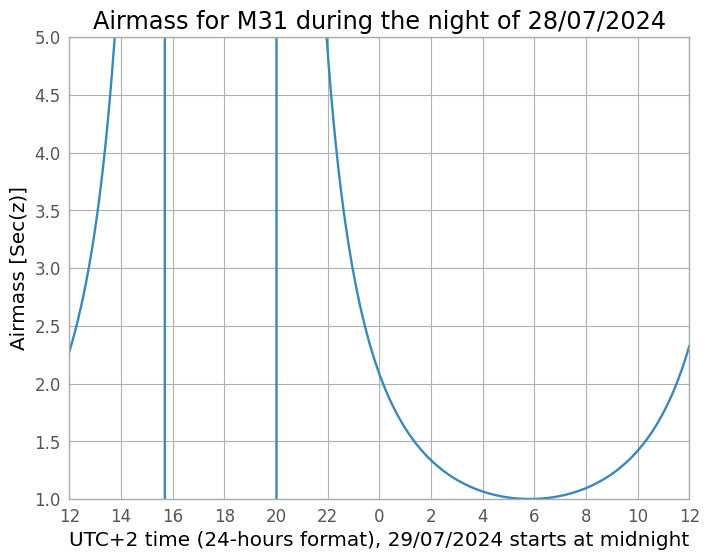

In [8]:
hour_ticks = (np.arange(13) * 2 - 12) * u.hour
hour_labels = [int((hour.value + 24) % 24) for hour in hour_ticks]

object_airmass = object_altaz.secz

plt.plot(delta_midnight, object_airmass)
plt.xlim(-12*u.hour, 12*u.hour)
plt.ylim(1, 5)
plt.xticks(hour_ticks, hour_labels)
plt.title(f'Airmass for {object_name} during the night of {year_month_day}')
plt.xlabel(f'UTC+{offset_hours} time (24-hours format), {year_month_day_tomorrow} starts at midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

Get the coordinates of the Moon:

In [9]:
moon_coords = get_body("moon", times)
moon_altaz = moon_coords.transform_to(frame)

Plot the visibility of the object on a given data alongside the Sun and the Moon:

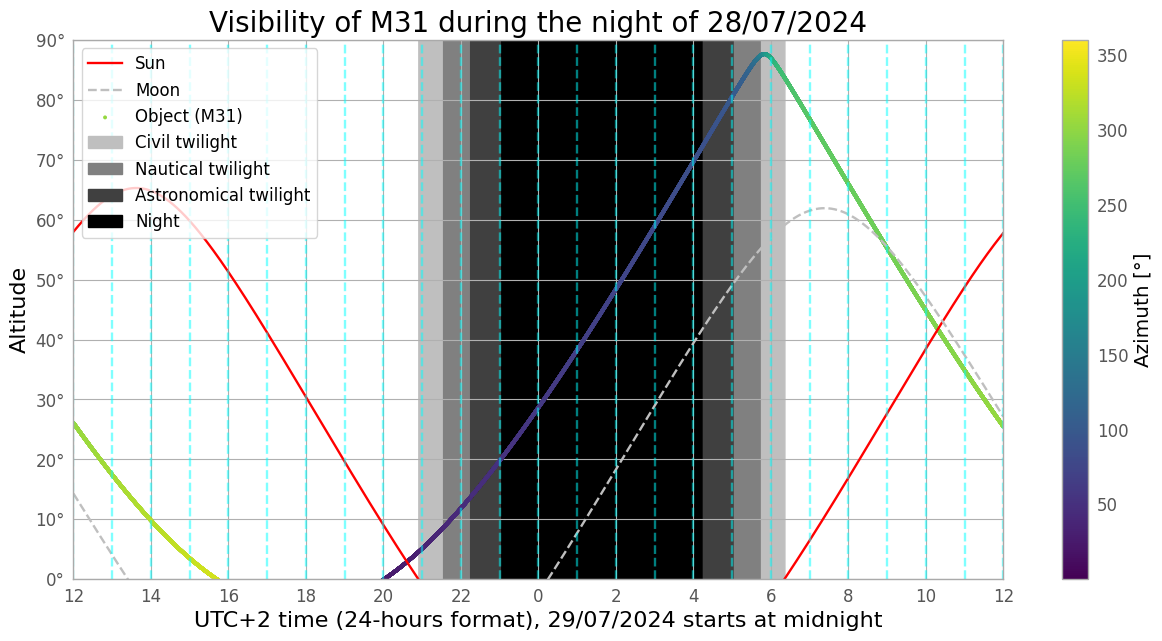

The object is visible the whole night.


In [10]:
plt.figure(figsize=(15, 7))
plt.plot(delta_midnight, sun_altaz.alt, color='r', label='Sun')
plt.plot(delta_midnight, moon_altaz.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, object_altaz.alt,
            c=object_altaz.az.value, label=f'{object_name}', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sun_altaz.alt < -0*u.deg, color='0.75', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sun_altaz.alt < -6*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sun_altaz.alt < -12*u.deg, color='0.25', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sun_altaz.alt < -18*u.deg, color='0.', zorder=0)
plt.colorbar().set_label('Azimuth [°]')

plt.legend(loc='upper left', labels=['Sun','Moon',f'Object ({object_name})','Civil twilight', 'Nautical twilight', 'Astronomical twilight', 'Night'])
plt.xlim(-12*u.hour, 12*u.hour)
hour_ticks = (np.arange(13) * 2 - 12) * u.hour
hour_labels = [int((hour.value + 24) % 24) for hour in hour_ticks]
plt.xticks(hour_ticks, hour_labels)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel(f'UTC+{offset_hours} time (24-hours format), {year_month_day_tomorrow} starts at midnight', fontsize=16)
plt.ylabel('Altitude', fontsize=16)
plt.title(f"Visibility of {object_name} during the night of {year_month_day}", fontsize=20)
for hour in range(-12, 13):
    plt.axvline(x=hour, color='cyan', linestyle='--', alpha=0.5)
plt.show()

try:
    if object_name.lower() in ['mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']:
        # Calculate object_coordinates for planets using get_body
        object_name_lower = object_name.lower()
        object_coordinates = get_body(object_name_lower, times)
        object_name = object_name.capitalize()
        
        all_positive = all(object_altaz.alt[below_minus_0_indices] > -34 * u.arcmin)
        if all_positive:
            print("The object is visible the whole night.")
        else:
            all_negative = all(object_altaz.alt[below_minus_0_indices] < -34 * u.arcmin)
            if all_negative:
                print("The object is not visible this night.")
            else:
                sign_changes = []
                sign_changes_minus = []
                for i in range(1, len(object_altaz.alt)):
                    if object_altaz.alt[i-1] < -34 * u.arcmin and object_altaz.alt[i] >= -34 * u.arcmin:
                        sign_changes.append(i)
                    elif object_altaz.alt[i-1] > -34 * u.arcmin and object_altaz.alt[i] <= -34 * u.arcmin:
                        sign_changes_minus.append(i)
                sign_change_timestamps = [times[index] for index in sign_changes]
                sign_change_timestamps_minus = [times[index] for index in sign_changes_minus]
                if sign_change_timestamps and sign_change_timestamps_minus:
                    if sign_change_timestamps[0] + utcoffset < sign_change_timestamps_minus[0] + utcoffset:
                        print(f'Object rises at ', sign_change_timestamps[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes][0], 2), '° azimuth.', sep='')
                        print(f'Object sets at ', sign_change_timestamps_minus[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes_minus][0], 2), '° azimuth.', sep='')
                    else:
                        print(f'Object sets at ', sign_change_timestamps_minus[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes_minus][0], 2), '° azimuth.', sep='')
                        print(f'Object rises at ', sign_change_timestamps[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes][0], 2), '° azimuth.', sep='')
                print("Object culminates at ", (times[np.argmax(object_altaz.alt)] + utcoffset).value, " at altitude ", round(max(object_altaz.alt.degree), 2), "°.", sep='')
    else:
        # Calculate object_coordinates for other celestial objects
        object_coordinates = SkyCoord.from_name(object_name)
        
        # Perform RA and Dec checks for non-planetary objects
        if object_coordinates.dec.degree < max_lat:
            print("The object is never visible from this latitude.")
        elif object_coordinates.dec.degree > latitude:
            print("The object is visible throughout the whole year at night.")
        else:
            all_positive = all(object_altaz.alt[below_minus_0_indices] > -34 * u.arcmin)
            if all_positive:
                print("The object is visible the whole night.")
            else:
                all_negative = all(object_altaz.alt[below_minus_0_indices] < -34 * u.arcmin)
                if all_negative:
                    print("The object is not visible this night.")
                else:
                    sign_changes = []
                    sign_changes_minus = []
                    for i in range(1, len(object_altaz.alt)):
                        if object_altaz.alt[i-1] < -34 * u.arcmin and object_altaz.alt[i] >= -34 * u.arcmin:
                            sign_changes.append(i)
                        elif object_altaz.alt[i-1] > -34 * u.arcmin and object_altaz.alt[i] <= -34 * u.arcmin:
                            sign_changes_minus.append(i)
                    sign_change_timestamps = [times[index] for index in sign_changes]
                    sign_change_timestamps_minus = [times[index] for index in sign_changes_minus]
                    if sign_change_timestamps and sign_change_timestamps_minus:
                        if sign_change_timestamps[0] + utcoffset < sign_change_timestamps_minus[0] + utcoffset:
                            print(f'Object rises at ', sign_change_timestamps[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes][0], 2), '° azimuth.', sep='')
                            print(f'Object sets at ', sign_change_timestamps_minus[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes_minus][0], 2), '° azimuth.', sep='')
                        else:
                            print(f'Object sets at ', sign_change_timestamps_minus[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes_minus][0], 2), '° azimuth.', sep='')
                            print(f'Object rises at ', sign_change_timestamps[0] + utcoffset, ' at ', round(object_altaz.az.degree[sign_changes][0], 2), '° azimuth.', sep='')
                    print("Object culminates at ", (times[np.argmax(object_altaz.alt)] + utcoffset).value, " at altitude ", round(max(object_altaz.alt.degree), 2), "°.", sep='')
except:
    print("No object found. Try again.")

Function to calculate Moon phase:

In [11]:
def moon_phase(number, difference):
    if difference > 0:
        lookup = {
        'new moon': (0, 1),
        'waxing crescent': (1, 45),
        'first quarter': (45, 55),
        'waxing gibbous': (55, 99),
        'full moon': (99, 100)
    }
    else:
        lookup = {
        'new moon': (0, 1),
        'waning crescent': (1, 45),
        'third quarter': (45, 55),
        'waning gibbous': (55, 99),
        'full moon': (99, 100)
    }
    for category, (start, end) in lookup.items():
        if start <= number < end:
            return category
    return 'Out of range'

Get the Moon illumination percentage, phase and in which constellation it is at midnight:

In [12]:
time = Time(midnight, format='iso', scale='utc')
moon_illumination = astroplan.moon_illumination(time)
moon_illumination_percentage = moon_illumination * 100
time2 = time + 1*u.hour
moon_illumination_2 = astroplan.moon_illumination(time2)
number = moon_illumination*100
diff = moon_illumination_2-moon_illumination

category = moon_phase(number, diff)
moon_midnight = get_body("moon", time)
moon_midnight
moon_constellation = get_constellation(moon_midnight, short_name=False, constellation_list='iau')
print(f"The Moon is {moon_illumination_percentage:.2f}% illuminated ({category} phase) at midnight in ", moon_constellation,".", sep='')

The Moon is 52.42% illuminated (third quarter phase) at midnight in Aries.


Plot the angular distances between the object and the Moon and the Sun respectively:

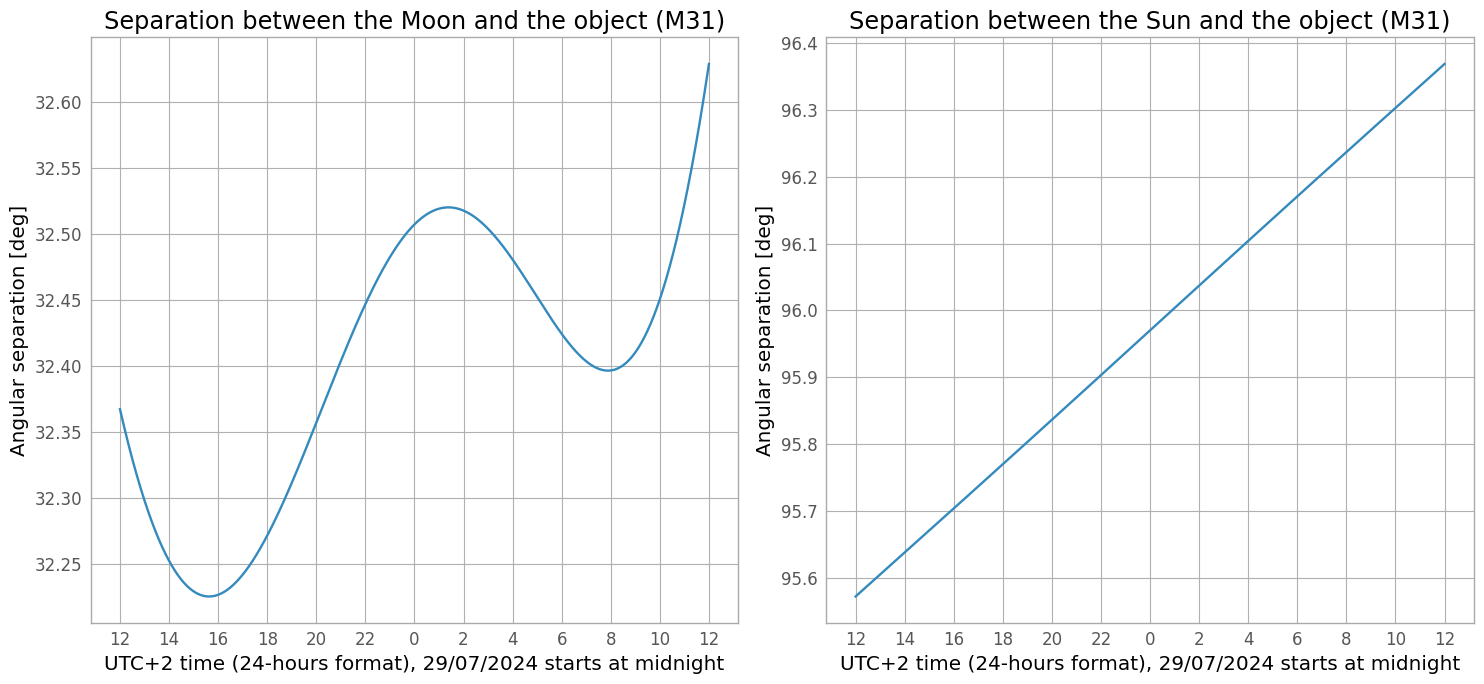

Angular separation from the Moon is 32.51° at midnight.
Angular separation from the Sun is 95.97° at midnight.

0° means conjunction, 180° opposition (best to observe).


In [13]:
angular_separation_moon = moon_altaz.separation(object_altaz)
angular_separation_sun = sun_altaz.separation(object_altaz)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(delta_midnight, angular_separation_moon.deg, label='Angular separation')
ax[0].set_xticks(hour_ticks)
ax[0].set_xticklabels(hour_labels)
ax[0].set_xlabel(f'UTC+{offset_hours} time (24-hours format), {year_month_day_tomorrow} starts at midnight')
ax[0].set_ylabel('Angular separation [deg]')
ax[0].set_title(f'Separation between the Moon and the object ({object_name})')

ax[1].plot(delta_midnight, angular_separation_sun.deg, label='Angular separation')
ax[1].set_xticks(hour_ticks)
ax[1].set_xticklabels(hour_labels)
ax[1].set_xlabel(f'UTC+{offset_hours} time (24-hours format), {year_month_day_tomorrow} starts at midnight')
ax[1].set_ylabel('Angular separation [deg]')
ax[1].set_title(f'Separation between the Sun and the object ({object_name})')

plt.tight_layout()
plt.show()

print(f"Angular separation from the Moon is {angular_separation_moon[len(angular_separation_sun)//2].deg:.2f}° at midnight.")
print(f"Angular separation from the Sun is {angular_separation_sun[len(angular_separation_sun)//2].deg:.2f}° at midnight.")

print("\n0° means conjunction, 180° opposition (best to observe).")

Plot how the object appears over night, alongside the Moon:

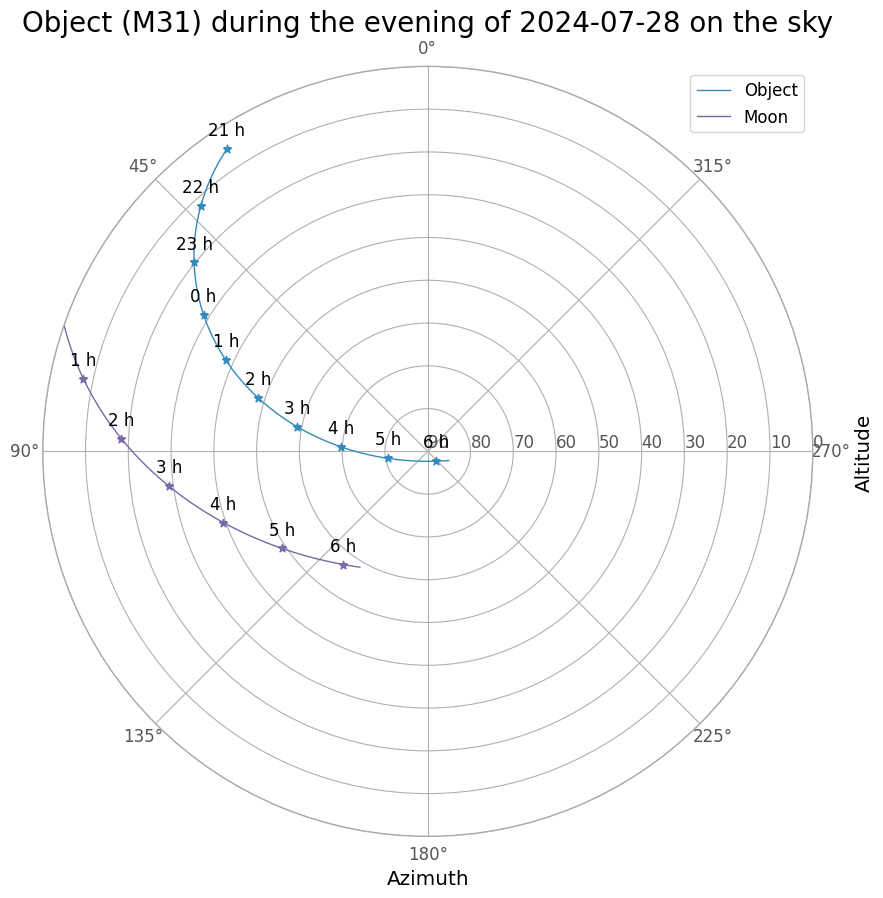

In [14]:
subset = delta_midnight[below_minus_0_indices].value
whole_numbers = [item for item in subset if item == int(item)]
whole_numbers = [number if number >= 0 else 24 + number for number in whole_numbers]
whole_number_indices = [i for i, item in enumerate(subset) if item == int(item)]

whole_number_indices =np.array(whole_number_indices)
updated_indices = whole_number_indices + below_minus_0_indices[0]

fig, axs = plt.subplots(1, 1, figsize=(15,10), subplot_kw={'projection': 'polar'})
   
axs.set_rlim(bottom=90, top=0)

axs.scatter(np.radians(object_altaz[updated_indices].az.value), object_altaz[updated_indices].alt.value, marker='*')
axs.plot(np.radians(object_altaz[below_minus_0_indices].az.value), object_altaz[below_minus_0_indices].alt.value, label='Object',linewidth=1.0)
axs.scatter(np.radians(moon_altaz[updated_indices].az.value), moon_altaz[updated_indices].alt.value, marker='*')
axs.plot(np.radians(moon_altaz[below_minus_0_indices].az.value), moon_altaz[below_minus_0_indices].alt.value, linewidth=1.0, label='Moon')
axs.set_theta_zero_location('N')
axs.set_theta_direction(1)
axs.set_rlabel_position(-90)
axs.set_xlabel('Azimuth')
axs.set_ylabel('Altitude', rotation=90, labelpad=30)
axs.yaxis.set_label_position('right') 
axs.set_title(f"Object ({object_name}) during the evening of {observation_time.strftime('%Y-%m-%d')} on the sky", fontsize=20)
plt.legend()
indeks = 0
for idx in updated_indices:
    actual_index = idx
    az_value = object_altaz.az[actual_index]
    alt_value = object_altaz.alt[actual_index]
    az_value_moon = moon_altaz.az[actual_index]
    alt_value_moon = moon_altaz.alt[actual_index]
    if 0 <= az_value.value < 90:
        xytext = (-15, -15)
    elif 90 <= az_value.value < 180:
        xytext = (-15, -15)
    elif 180 <= az_value.value < 270:
        xytext = (-10, -20)
    else:
        xytext = (10, -20)
    plt.annotate(f'{int(whole_numbers[indeks])} h', (np.radians(az_value), alt_value),
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{int(whole_numbers[indeks])} h', (np.radians(az_value_moon), alt_value_moon),
                 textcoords="offset points", xytext=(0,10), ha='center')
    indeks += 1
    
plt.show()

Plot the duration of twilight and night for this location throughout the year 2024:

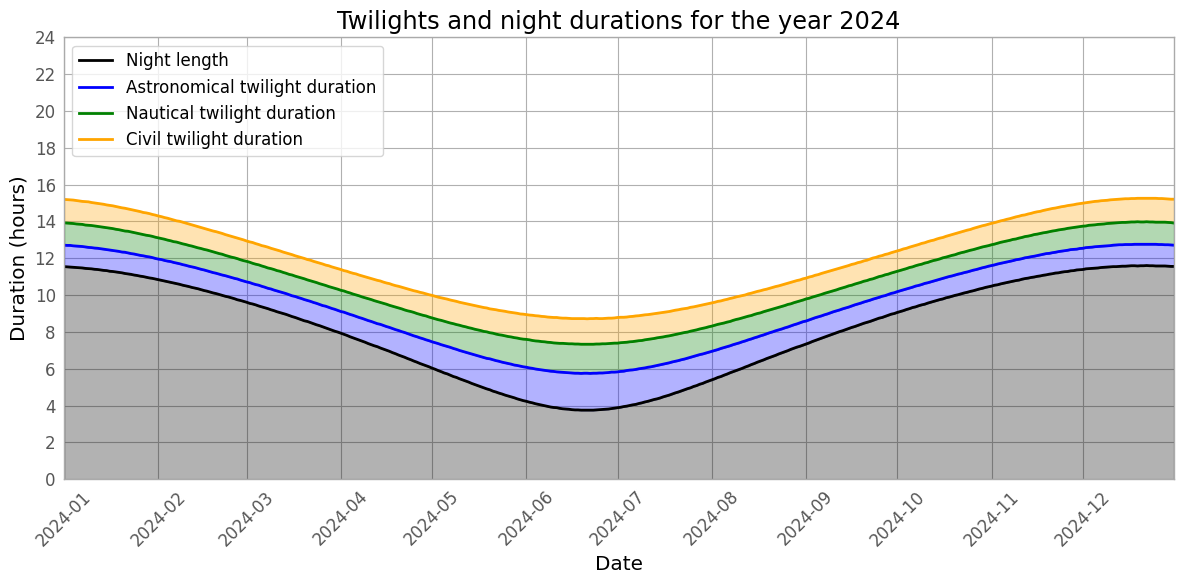

In [15]:
year = 2024

dates = []
night_lengths = []
astronomical_twilight_durations = []
nautical_twilight_durations = []
civil_twilight_durations = []

shortest_night_duration = np.inf
longest_night_duration = -np.inf
shortest_night_date = None
longest_night_date = None

num_intervals = 2000

for month in range(1, 13):  # Months 1 to 12
    if month in [4, 6, 9, 11]:
        num_days = 30
    elif month == 2:
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            num_days = 29  # Leap year
        else:
            num_days = 28
    else:
        num_days = 31

    for day in range(1, num_days + 1):
        date = f'{year}-{month:02d}-{day:02d} 00:00:00'
        date_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        midnight = Time(date) - utcoffset

        delta_midnight = np.linspace(-12, 12, num_intervals)*u.hour
        times = midnight + delta_midnight

        frame = AltAz(obstime=times, location=loc)
        sunaltazs = get_sun(times).transform_to(frame)

        below_minus_18_indices = np.where(sunaltazs.alt < -18*u.deg)[0]

        astronomical_twilight_indices = np.where((sunaltazs.alt >= -18*u.deg) & (sunaltazs.alt <= -12*u.deg))[0]

        nautical_twilight_indices = np.where((sunaltazs.alt >= -12*u.deg) & (sunaltazs.alt <= -6*u.deg))[0]

        civil_twilight_indices = np.where((sunaltazs.alt >= -6*u.deg) & (sunaltazs.alt <= 0*u.deg))[0]

        if below_minus_18_indices.size >= 2:
            night_length = delta_midnight[below_minus_18_indices[-1]] - delta_midnight[below_minus_18_indices[0]]
            night_lengths.append(night_length.to(u.hour).value)

            if night_length < shortest_night_duration:
                shortest_night_duration = night_length
                shortest_night_date = date_object
            if night_length > longest_night_duration:
                longest_night_duration = night_length
                longest_night_date = date_object

        if astronomical_twilight_indices.size >= 2:
            astronomical_twilight_duration = delta_midnight[astronomical_twilight_indices[-1]] - delta_midnight[astronomical_twilight_indices[0]]
            astronomical_twilight_durations.append(astronomical_twilight_duration.to(u.hour).value)

        if nautical_twilight_indices.size >= 2:
            nautical_twilight_duration = delta_midnight[nautical_twilight_indices[-1]] - delta_midnight[nautical_twilight_indices[0]]
            nautical_twilight_durations.append(nautical_twilight_duration.to(u.hour).value)

        if civil_twilight_indices.size >= 2:
            civil_twilight_duration = delta_midnight[civil_twilight_indices[-1]] - delta_midnight[civil_twilight_indices[0]]
            civil_twilight_durations.append(civil_twilight_duration.to(u.hour).value)

        dates.append(date_object)

plt.figure(figsize=(12, 6))
plt.plot(dates, night_lengths, color='black', linewidth=2, label='Night length')
plt.plot(dates, astronomical_twilight_durations, color='blue', linewidth=2, label='Astronomical twilight duration')
plt.plot(dates, nautical_twilight_durations, color='green', linewidth=2, label='Nautical twilight duration')
plt.plot(dates, civil_twilight_durations, color='orange', linewidth=2, label='Civil twilight duration')

plt.fill_between(dates, 0, night_lengths, color='black', alpha=0.3)
plt.fill_between(dates, night_lengths, astronomical_twilight_durations, color='blue', alpha=0.3)
plt.fill_between(dates, astronomical_twilight_durations, nautical_twilight_durations, color='green', alpha=0.3)
plt.fill_between(dates, nautical_twilight_durations, civil_twilight_durations, color='orange', alpha=0.3)

plt.ylim(0, 24)
plt.yticks(np.arange(0, 25, 2))

first_date = dates[0]
last_date = dates[-1]
plt.xlim(first_date, last_date)

plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title(f'Twilights and night durations for the year {year}')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Plot the altitude of the object in the middle of the night over a time interval:

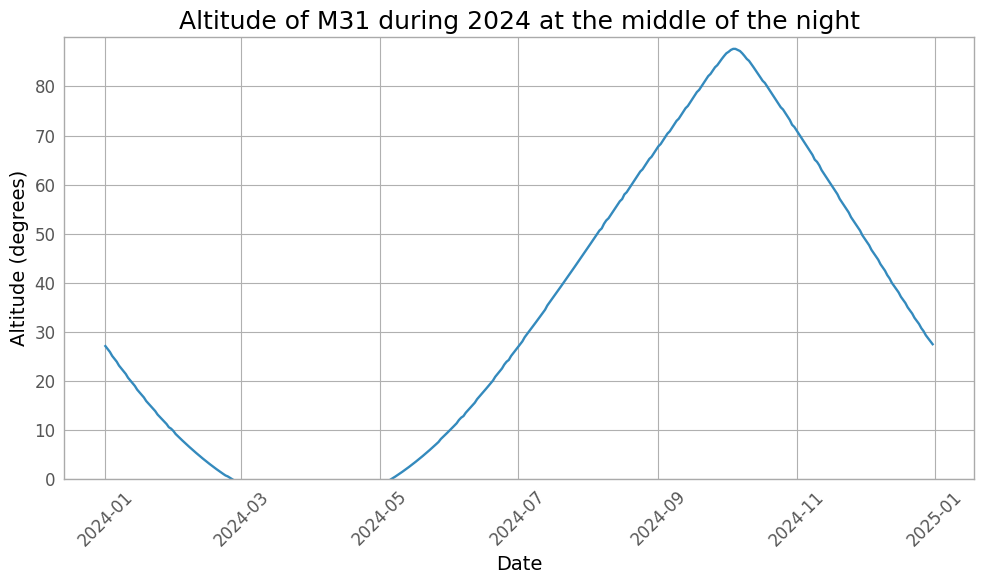

In [16]:
year = 2024
start_month = 1
end_month = 12  # Set to the end month you want to include

middle_of_the_night_list = []

for month in range(start_month, end_month + 1):  
    for day in range(1, 32):  # 1 to 31 for days
        try:
            chosen_date = datetime(year, month, day)

            midnight = Time(chosen_date.strftime('%Y-%m-%d 00:00:00'))

            delta_midnight = np.linspace(-12, 12, 1000)*u.hour
            times = midnight + delta_midnight

            frame = AltAz(obstime=times, location=loc)
            sunaltazs = get_sun(times).transform_to(frame)

            below_minus_18_indices = np.where(sunaltazs.alt < -18*u.deg)[0]
            if len(below_minus_18_indices) > 0:
                middle_index = len(below_minus_18_indices) // 2
                middle_of_the_night_timestamp = times[below_minus_18_indices[middle_index]]
                middle_of_the_night_list.append(middle_of_the_night_timestamp)

        except ValueError:
            pass

altitude_data = []
time_data = []

for timestamp in middle_of_the_night_list:
    frame = AltAz(obstime=timestamp, location=loc)
    object_altaz = object_coordinates.transform_to(frame)
    
    altitude_data.append(object_altaz.alt.deg)
    time_data.append(timestamp.datetime)

plt.figure(figsize=(10, 6))
plt.plot(time_data, altitude_data, linestyle='-')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Altitude (degrees)', fontsize=14)
plt.title(f'Altitude of {object_name} during {year} at the middle of the night', fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.yticks(np.arange(0, 90, 10))
plt.ylim([0,90])
plt.show()


Plot the hours above the given altitude for the object during night (starting from civil twilight) and astronomical night:

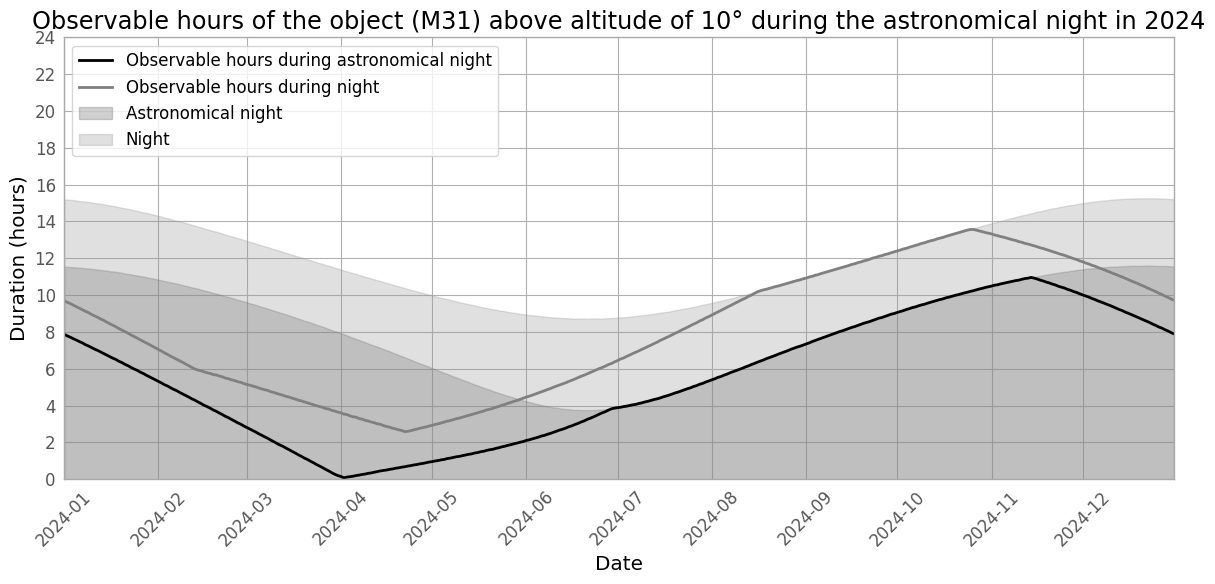

In [17]:
dates = []
night_lengths_18 = []
night_lengths_0 = []

num_intervals = 2000
year = 2024
%reset_selective -f altitude 
altitude = 10
if 'altitude' in locals():
    if isinstance(altitude, (int, float)):
        if 0 < altitude <= 90:
            pass
        else:
            raise ValueError("Invalid value for altitude. Altitude must be between 0 and 90 degrees.")
    else:
        raise TypeError("Invalid altitude. Please enter a numeric value.")
else:
    while True:
        try:
            altitude = float(input("Enter your altitude: "))
            if 0 < altitude <= 90:
                break
            else:
                print("Invalid value for altitude. Altitude must be between 0 and 90 degrees.")
        except:
            print("Invalid altitude. Please enter a numeric value.") 
    
for month in range(1, 13):  # Months 1 to 12 (+1 to include)
    if month in [4, 6, 9, 11]:
        num_days = 30
    elif month == 2:
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            num_days = 29  # Leap year
        else:
            num_days = 28
    else:
        num_days = 31

    for day in range(1, num_days + 1):
        date = f'{year}-{month:02d}-{day:02d} 00:00:00'
        date_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        midnight = Time(date) - utcoffset

        delta_midnight = np.linspace(-12, 12, num_intervals)*u.hour
        times = midnight + delta_midnight

        frame = AltAz(obstime=times, location=loc)
        sun_altaz = get_sun(times).transform_to(frame)

        below_minus_18_indices = np.where(sun_altaz.alt < -18*u.deg)[0]
        below_minus_0_indices = np.where(sun_altaz.alt < -0*u.deg)[0]
        frame_18 = AltAz(obstime=times[below_minus_18_indices], # below_minus_0_indices
                          location=loc)
        frame_0 = AltAz(obstime=times[below_minus_0_indices], # below_minus_0_indices
                          location=loc)
        object_altaz_18 = object_coordinates.transform_to(frame_18)
        object_altaz_0 = object_coordinates.transform_to(frame_0)
        below_minus_18_indices = np.where(object_altaz_18.alt > altitude*u.deg)[0]
        below_minus_0_indices = np.where(object_altaz_0.alt > altitude*u.deg)[0]
        if below_minus_18_indices.size >= 2:
            threshold = 2 
            differences_18 = np.diff(below_minus_18_indices)
            steep_indices_18 = np.where(differences_18 > threshold)[0]
            if len(steep_indices_18)==0:
                night_length_18 = delta_midnight[below_minus_18_indices[-1]] - delta_midnight[below_minus_18_indices[0]]   
            else: # if the object sets and rises in the same night
                night_length_18 = delta_midnight[below_minus_18_indices[-1]] - delta_midnight[below_minus_18_indices[steep_indices_18[0]+1]] + delta_midnight[below_minus_18_indices[steep_indices_18[0]]] - delta_midnight[below_minus_18_indices[0]]
            
            
            night_lengths_18.append(night_length_18.to(u.hour).value)
        if below_minus_0_indices.size >= 2:
            threshold = 2 
            differences_0 = np.diff(below_minus_0_indices)
            steep_indices_0 = np.where(differences_0 > threshold)[0]
            if len(steep_indices_0)==0:
                night_length_0 = delta_midnight[below_minus_0_indices[-1]] - delta_midnight[below_minus_0_indices[0]]   
            else: # if the object sets and rises in the same night
                night_length_0 = delta_midnight[below_minus_0_indices[-1]] - delta_midnight[below_minus_0_indices[steep_indices_0[0]+1]] + delta_midnight[below_minus_0_indices[steep_indices_0[0]]] - delta_midnight[below_minus_0_indices[0]]
            night_lengths_0.append(night_length_0.to(u.hour).value)
            
        dates.append(date_object)

plt.figure(figsize=(12, 6))
plt.plot(dates, night_lengths_18, color='0', linewidth=2, label='Observable hours during astronomical night')
plt.plot(dates, night_lengths_0, color='0.5', linewidth=2, label='Observable hours during night')


plt.fill_between(dates, 0, night_lengths, color='0.4', alpha=0.3, label='Astronomical night')
plt.fill_between(dates, 0, civil_twilight_durations, color='0.6', alpha=0.3, label='Night')

plt.ylim(0, 24)
plt.yticks(np.arange(0, 25, 2))

first_date = dates[0]
last_date = dates[-1]
plt.xlim(first_date, last_date)

plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title(f'Observable hours of the object ({object_name}) above altitude of {altitude}° during the astronomical night in {year}')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
